# DBSCAN

### (Unsupervised learning)

By Alberto Valdés 

**Mail 1:** anvaldes@uc.cl 

**Mail 2:** alberto.valdes.gonzalez.96@gmail.com

In [1]:
import warnings
warnings.filterwarnings("ignore")

In [2]:
import time
import scipy
import numpy as np
import pandas as pd
from datetime import datetime
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
from matplotlib import image as mpimg
from sklearn.preprocessing import OrdinalEncoder

In [3]:
def display_img(name, a, b):
    plt.figure(figsize = (a, b))
    image = mpimg.imread(name)
    plt.imshow(image)
    plt.axis('off')
    plt.show()

### Steps to cluster

1. Fill NaNs.
2. Encoding categorical variables.
3. Standarize or Scaling the variables.
4. We can do a dimension reduccion. (optional)
5. Apply the clusterization method.
6. Choose the optimal number of cluster using Elbow Method or Sillhoute score.

# DBSCAN: Explanation

* It is an algorithm based in the **density** on the data y its applied to a set of data with noise and outliers.

* The main idea is that: "The cluster are dense regions separated by regions by less density". 

$ \ $

This algorithm have two parameters:

1. **Epsilon (eps):** It is how close the points must be to be considered part of the same cluster. This means that if two points are less than **epsilon** apart, then they are considered neighbors.

2. **Minimum points (min samples):** It is the minimum number of points to form a dense region. 

$ \ $

There is 3 types of points:

1. **Core point:** A point is a core point if within its neighborhood there are at least a **minimum number** of points.

2. **Border point:** A point is a border point if within its neighborhood there are less points than the **minimum number** of points. However within its neighborhood there are a **core point**.

3. **Outliers:** A point is an outlier if it isn't a core or border point.

### Terms to understand DBSCAN

1. **Direct density reachable:** A point is called density reachable if it has a core point in its neighborhood.

2. **Density reachable:** A point is called density reachable from another point if there are connected through a series of core point.

3. **Density connected:** Two points are called density connected if there is a core point which is density reachable for both points. 

$ \ $

**A cluster is formed by a density connected points**

### Another way to look at it is

1. Identified the core, border and outliers points.

2. Every core point forms a "sub-pre-cluster" with its neighborhood.

3. If a "sub-pre-cluster" have a common point with another "sub-pre-cluster" then both "sub-pre-cluster" forms a same "pre-cluster".

4. For every border point see the core points in its neighborhood. See the "pre-cluster" which belongs the core point then the border points belong to this "pre-cluster". Every "pre-cluster" with its border points forms a "cluster". 

# Little Example

In [4]:
start = time.time()

In [5]:
X = [1, 3, 2.5, 1.5, 3, 2.8, 2.5, 1.2, 1, 1, 1, 5, 4]
Y = [2, 4, 4, 2.5, 5, 4.5, 4.5, 2.5, 3, 5, 2.5, 6, 3]

In [6]:
eps = 0.6
min_pts = 4

In [7]:
df = pd.DataFrame({'X': X, 'Y': Y})

In [8]:
df

,X,Y
0,1.0,2.0
1,3.0,4.0
2,2.5,4.0
3,1.5,2.5
4,3.0,5.0
5,2.8,4.5
6,2.5,4.5
7,1.2,2.5
8,1.0,3.0
9,1.0,5.0


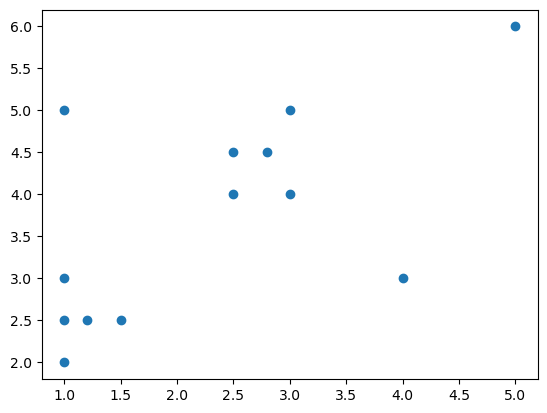

In [9]:
plt.scatter(df['X'], df['Y'])
plt.show()

In [10]:
all_points = []
names_points = []

for i in range(len(X)):

    all_points.append(np.array([X[i], Y[i]]))
    names_points.append(f'({X[i]}, {Y[i]})')

In [11]:
dist_mat = []

for i in range(len(all_points)):

    dist_col = []

    for j in range(len(all_points)):

        if i != j:

            dist_col.append(np.linalg.norm(all_points[i] - all_points[j]))

        else:
            dist_col.append(np.inf)

    dist_mat.append(dist_col)

In [12]:
dist_mat = pd.DataFrame(dist_mat)

In [13]:
dist_mat.index = names_points
dist_mat.columns = names_points

In [14]:
(dist_mat <= eps)*1

,"(1, 2)","(3, 4)","(2.5, 4)","(1.5, 2.5)","(3, 5)","(2.8, 4.5)","(2.5, 4.5)","(1.2, 2.5)","(1, 3)","(1, 5)","(1, 2.5)","(5, 6)","(4, 3)"
"(1, 2)",0,0,0,0,0,0,0,1,0,0,1,0,0
"(3, 4)",0,0,1,0,0,1,0,0,0,0,0,0,0
"(2.5, 4)",0,1,0,0,0,1,1,0,0,0,0,0,0
"(1.5, 2.5)",0,0,0,0,0,0,0,1,0,0,1,0,0
"(3, 5)",0,0,0,0,0,1,0,0,0,0,0,0,0
"(2.8, 4.5)",0,1,1,0,1,0,1,0,0,0,0,0,0
"(2.5, 4.5)",0,0,1,0,0,1,0,0,0,0,0,0,0
"(1.2, 2.5)",1,0,0,1,0,0,0,0,1,0,1,0,0
"(1, 3)",0,0,0,0,0,0,0,1,0,0,1,0,0
"(1, 5)",0,0,0,0,0,0,0,0,0,0,0,0,0


**a. First of all we identified the core points**

In [15]:
((dist_mat <= eps)*1).sum(axis = 1)

(1, 2)        2
(3, 4)        2
(2.5, 4)      3
(1.5, 2.5)    2
(3, 5)        1
(2.8, 4.5)    4
(2.5, 4.5)    2
(1.2, 2.5)    4
(1, 3)        2
(1, 5)        0
(1, 2.5)      4
(5, 6)        0
(4, 3)        0
dtype: int64

**Core points:** (2.8, 4.5), (1.2, 2.5), (1, 2.5)

**b. Secondly we have to identified the border points**

In [16]:
dist_mat['(2.8, 4.5)'][(dist_mat['(2.8, 4.5)'] <= eps)*1 == 1]

(3, 4)        0.538516
(2.5, 4)      0.583095
(3, 5)        0.538516
(2.5, 4.5)    0.300000
Name: (2.8, 4.5), dtype: float64

(3, 4), (2.5, 4), (3, 5), (2.5, 4.5)

In [17]:
dist_mat['(1.2, 2.5)'][(dist_mat['(1.2, 2.5)'] <= eps)*1 == 1]

(1, 2)        0.538516
(1.5, 2.5)    0.300000
(1, 3)        0.538516
(1, 2.5)      0.200000
Name: (1.2, 2.5), dtype: float64

(1, 2), (1.5, 2.5), (1, 3) **[(1, 2.5) is a core point]**

In [18]:
dist_mat['(1, 2.5)'][(dist_mat['(1, 2.5)'] <= eps)*1 == 1]

(1, 2)        0.5
(1.5, 2.5)    0.5
(1.2, 2.5)    0.2
(1, 3)        0.5
Name: (1, 2.5), dtype: float64

(1, 2), (1.5, 2.5), (1, 3) **[(1.2, 2.5) is a core point]**

**Border points:** (3, 4), (2.5, 4), (3, 5), (2.5, 4.5), (1, 2), (1.5, 2.5), (1, 3)

**c. Finally the outliers**

**Outliers:** (1, 5), (5, 6), (4, 3)

**d. Create the sub-pre-clusters**

In [19]:
dist_mat['(2.8, 4.5)'][dist_mat['(2.8, 4.5)'] <= eps]

(3, 4)        0.538516
(2.5, 4)      0.583095
(3, 5)        0.538516
(2.5, 4.5)    0.300000
Name: (2.8, 4.5), dtype: float64

sub-pre-cluster 1: **(2.8, 4.5)**, (3, 4), (2.5, 4), (3, 5), (2.5, 4.5)

In [20]:
dist_mat['(1.2, 2.5)'][dist_mat['(1.2, 2.5)'] <= eps]

(1, 2)        0.538516
(1.5, 2.5)    0.300000
(1, 3)        0.538516
(1, 2.5)      0.200000
Name: (1.2, 2.5), dtype: float64

sub-pre-cluster 2: **(1.2, 2.5)**, (1, 2), (1.5, 2.5), (1, 3), (1, 2.5)

In [21]:
dist_mat['(1, 2.5)'][dist_mat['(1, 2.5)'] <= eps]

(1, 2)        0.5
(1.5, 2.5)    0.5
(1.2, 2.5)    0.2
(1, 3)        0.5
Name: (1, 2.5), dtype: float64

sub-pre-cluster 3: **(1, 2.5)**, (1, 2), (1.5, 2.5), (1.2, 2.5), (1, 3)

**e. Create the pre-clusters**

pre-cluster 1: (2.8, 4.5), (3, 4), (2.5, 4), (3, 5), (2.5, 4.5)

pre-cluster 2: (1.2, 2.5), (1, 2), (1.5, 2.5), (1, 3), (1, 2.5)

**f. Create the clusters**

cluster 1: (2.8, 4.5), (3, 4), (2.5, 4), (3, 5), (2.5, 4.5)

cluster 2: (1.2, 2.5), (1, 2), (1.5, 2.5), (1, 3), (1, 2.5)

# General Example

# 1. Preprocessing

### i. Read Dataframe

In [22]:
df = pd.read_csv('marketing_campaign.csv', delimiter = '\t')

In [23]:
df.columns

Index(['ID', 'Year_Birth', 'Education', 'Marital_Status', 'Income', 'Kidhome',
       'Teenhome', 'Dt_Customer', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response'],
      dtype='object')

In [24]:
df.dtypes

ID                       int64
Year_Birth               int64
Education               object
Marital_Status          object
Income                 float64
Kidhome                  int64
Teenhome                 int64
Dt_Customer             object
Recency                  int64
MntWines                 int64
MntFruits                int64
MntMeatProducts          int64
MntFishProducts          int64
MntSweetProducts         int64
MntGoldProds             int64
NumDealsPurchases        int64
NumWebPurchases          int64
NumCatalogPurchases      int64
NumStorePurchases        int64
NumWebVisitsMonth        int64
AcceptedCmp3             int64
AcceptedCmp4             int64
AcceptedCmp5             int64
AcceptedCmp1             int64
AcceptedCmp2             int64
Complain                 int64
Z_CostContact            int64
Z_Revenue                int64
Response                 int64
dtype: object

### ii. Compute/Encoding features

**Age**

In [25]:
now = datetime.today().year
df['Age'] = (now - df['Year_Birth'])

In [26]:
df = df.drop(columns = ['ID', 'Year_Birth'])

**b. Education**

In [27]:
df['Education'].value_counts()

Graduation    1127
PhD            486
Master         370
2n Cycle       203
Basic           54
Name: Education, dtype: int64

In [28]:
edu_values = ['Basic', '2n Cycle', 'Graduation', 'Master', 'PhD']

In [29]:
ord_enc = OrdinalEncoder(categories = [edu_values])

In [30]:
ord_enc = ord_enc.fit(df[['Education']])

In [31]:
df['Education'] = pd.DataFrame(ord_enc.transform(df[['Education']]))[0]

In [32]:
df['Education'].value_counts()

2.0    1127
4.0     486
3.0     370
1.0     203
0.0      54
Name: Education, dtype: int64

**c. Marital Status**

In [33]:
df['Marital_Status'].value_counts()

Married     864
Together    580
Single      480
Divorced    232
Widow        77
Alone         3
Absurd        2
YOLO          2
Name: Marital_Status, dtype: int64

In [34]:
df = df.replace({'Marital_Status': {'Single': 'Other', 'Divorced': 'Other', 'Widow': 'Other', 'Alone': 'Other', 'Absurd': 'Other', 'YOLO': 'Other'}})

In [35]:
df['Marital_Status'].value_counts()

Married     864
Other       796
Together    580
Name: Marital_Status, dtype: int64

In [36]:
mari_values = ['Other', 'Together', 'Married']

In [37]:
ord_enc = OrdinalEncoder(categories = [mari_values])

In [38]:
ord_enc = ord_enc.fit(df[['Marital_Status']])

In [39]:
df['Marital_Status'] = pd.DataFrame(ord_enc.transform(df[['Marital_Status']]))[0]

In [40]:
df['Marital_Status'].value_counts()

2.0    864
0.0    796
1.0    580
Name: Marital_Status, dtype: int64

**d. Dt Costumer**

In [41]:
now = datetime.today()

In [42]:
df['Dt_Customer'] = (now - pd.to_datetime(df['Dt_Customer'])).dt.days/365

### iii. Types Variables

In [43]:
cols_df = list(df.columns)

In [44]:
df[cols_df] = df[cols_df].astype('float')

### iv. Normalize

In [45]:
mean_df = df.mean()
std_df = df.std()

In [46]:
df = (df - mean_df)/std_df

In [47]:
del_cols = list(std_df[std_df == 0].keys())

In [48]:
del_cols

['Z_CostContact', 'Z_Revenue']

In [49]:
df = df.drop(columns = del_cols)

### v. Drop NaNs

In [50]:
df = df.dropna()

# 2. Clustering

In [51]:
from sklearn.cluster import DBSCAN

In [52]:
from sklearn.metrics import silhouette_score

In [53]:
range_eps = [(i + 1)*0.1 for i in range(1, 1_000 + 1)]

range_eps_def = []
sil_sco = []
n_clusters = []

for eps_p in range_eps:

    model = DBSCAN(eps = eps_p, min_samples = 5).fit(df)
    n_clus = len(pd.Series(model.labels_).value_counts().keys())
    n_clus = n_clus - 1

    if  n_clus <= 2:

        pass

    else:

        sil_sco.append(silhouette_score(df, model.labels_, metric = 'euclidean'))
        range_eps_def.append(eps_p)
        n_clusters.append(n_clus)

range_eps_def = np.array(range_eps_def)
sil_sco = np.array(sil_sco)
n_clusters = np.array(n_clusters)

### a. Silhouette Coefficient

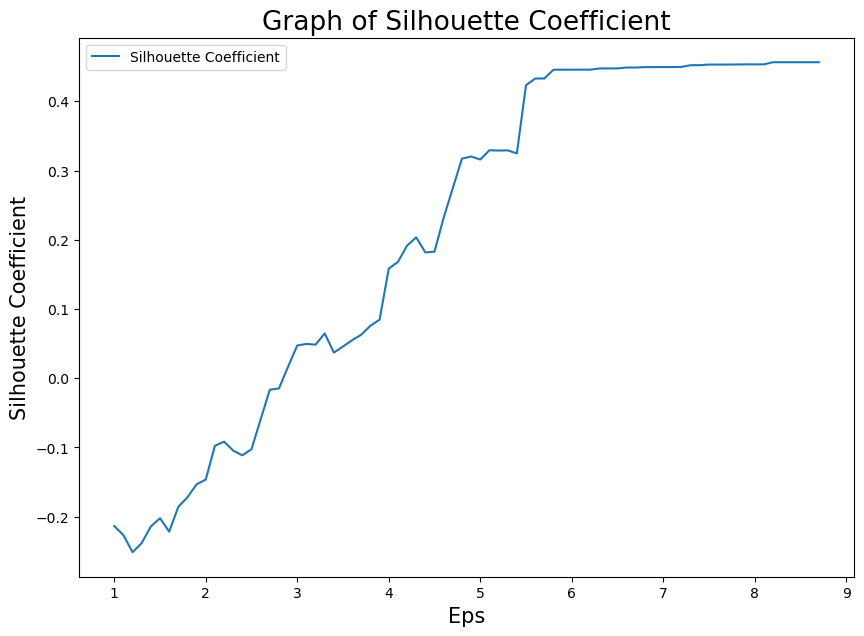

In [54]:
plt.figure(figsize = (10, 7))

plt.title('Graph of Silhouette Coefficient', fontsize = 19)

plt.plot(range_eps_def, sil_sco, label = 'Silhouette Coefficient')

plt.xlabel('Eps', fontsize = 15)
plt.ylabel('Silhouette Coefficient', fontsize = 15)

plt.legend()

plt.show()

In [55]:
eps_opt = range_eps_def[sil_sco == sil_sco.max()][0]
K_opt = n_clusters[sil_sco == sil_sco.max()][0]

In [56]:
eps_opt

8.200000000000001

In [57]:
K_opt

3

In [58]:
round(sil_sco.max(), 4)

0.4565

**Comments:** The optimal is $K = 3$ and $ eps = 8.2 $.

### c. Definitive model

In [59]:
model = DBSCAN(eps = eps_opt, min_samples = 5).fit(df)

In [60]:
df['cluster'] = pd.Series(model.labels_)

In [61]:
df['cluster'].value_counts()

 0.0    2136
 2.0      30
 1.0      21
-1.0       6
Name: cluster, dtype: int64

### Time of execution

In [62]:
end = time.time()

In [63]:
delta = (end - start)

hours = int(delta/3600)
mins = int((delta - hours*3600)/60)
segs = int(delta - hours*3600 - mins*60)
print(f'Execute this notebook take us {hours} hours, {mins} minutes and {segs} seconds.')

Execute this notebook take us 0 hours, 0 minutes and 50 seconds.
